In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import SpanSelector

In [107]:
b=pd.read_csv("positions_B_rk4.csv",sep=";")
c=pd.read_csv("positions_C_rk4.csv",sep=";")

In [89]:
print(b)

                 x             y          z    r
0        -0.000279     -0.513865    30.6898  1.8
1        -0.001121     -0.992468    29.1002  1.8
2        -0.002539     -1.407610    26.6467  1.8
3        -0.004551     -1.746830    23.5987  1.8
4        -0.007169     -2.029930    20.2842  1.8
...            ...           ...        ...  ...
24994  8425.470000 -21525.300000  8854.9300  1.8
24995  8426.210000 -21525.500000  8857.8000  1.8
24996  8426.940000 -21525.800000  8860.6400  1.8
24997  8427.640000 -21526.300000  8863.3800  1.8
24998  8428.270000 -21527.100000  8865.8400  1.8

[24999 rows x 4 columns]


In [90]:
print(c)

                 x             y            z    r
0        -0.000320      0.512969     0.630483  1.1
1        -0.001281      0.985525     2.451980  1.1
2        -0.002880      1.385350     5.263370  1.1
3        -0.005113      1.698170     8.755840  1.1
4        -0.007979      1.946660    12.553600  1.1
...            ...           ...          ...  ...
24994  8425.020000 -21535.000000  8858.870000  1.1
24995  8424.910000 -21536.500000  8856.350000  1.1
24996  8424.810000 -21538.100000  8853.860000  1.1
24997  8424.750000 -21539.400000  8851.490000  1.1
24998  8424.760000 -21540.300000  8849.440000  1.1

[24999 rows x 4 columns]


In [108]:
lightcurveholder=[]
timeholder=[]
area1=0
area2=0
coveredarea=0
temp1=0
temp2=0
temp3=0
temp4=0
for i in range(len(b)):
    if ((((b.iloc[i,0]-c.iloc[i,0])**2 + (b.iloc[i,2]-c.iloc[i,2])**2)**(0.5))<(b.iloc[i,3]+c.iloc[i,3])):
        timeholder.append(i)
        temp1=(((b.iloc[i,0]-c.iloc[i,0])**2 + (b.iloc[i,2]-c.iloc[i,2])**2)**(0.5))
        temp2=(b.iloc[i,3]**2)*np.arccos((b.iloc[i,3]**2 - c.iloc[i,3]**2 + temp1**2 ) / (2*temp1*b.iloc[i,3]))
        temp3=(c.iloc[i,3]**2)*np.arccos((c.iloc[i,3]**2 - b.iloc[i,3]**2 + temp1**2) / (2*temp1*c.iloc[i,3]))
        temp4=-0.5*np.sqrt((temp1+b.iloc[i,3]+c.iloc[i,3])*(temp1-b.iloc[i,3]+c.iloc[i,3])*(-temp1+b.iloc[i,3]+c.iloc[i,3])*(temp1+b.iloc[i,3]-c.iloc[i,3]))
        coveredarea=temp2+temp3+temp4
        if (b.iloc[i,1]>c.iloc[i,1]):
            lightcurveholder.append(10*coveredarea/(np.pi*c.iloc[i,3]*c.iloc[i,3]))
        else:
            lightcurveholder.append(9.5*coveredarea/(np.pi*c.iloc[i,3]*c.iloc[i,3]))
    else:
        lightcurveholder.append(9.5)
        timeholder.append(i)

/var/folders/h3/njy0b08x1r17x9nvn93c_6sr00cl3b/T/ipykernel_7545/3961308086.py:14: RuntimeWarning: invalid value encountered in arccos
  temp2=(b.iloc[i,3]**2)*np.arccos((b.iloc[i,3]**2 - c.iloc[i,3]**2 + temp1**2 ) / (2*temp1*b.iloc[i,3]))
/var/folders/h3/njy0b08x1r17x9nvn93c_6sr00cl3b/T/ipykernel_7545/3961308086.py:15: RuntimeWarning: invalid value encountered in arccos
  temp3=(c.iloc[i,3]**2)*np.arccos((c.iloc[i,3]**2 - b.iloc[i,3]**2 + temp1**2) / (2*temp1*c.iloc[i,3]))
/var/folders/h3/njy0b08x1r17x9nvn93c_6sr00cl3b/T/ipykernel_7545/3961308086.py:16: RuntimeWarning: invalid value encountered in sqrt
  temp4=-0.5*np.sqrt((temp1+b.iloc[i,3]+c.iloc[i,3])*(temp1-b.iloc[i,3]+c.iloc[i,3])*(-temp1+b.iloc[i,3]+c.iloc[i,3])*(temp1+b.iloc[i,3]-c.iloc[i,3]))


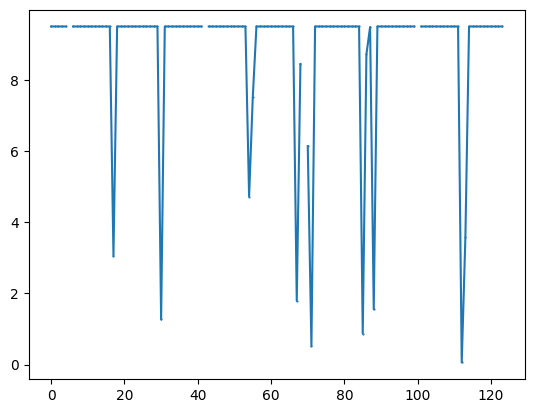

In [112]:
%matplotlib inline
plt.scatter(timeholder,lightcurveholder,s=0.3)
plt.plot(timeholder,lightcurveholder)

In [113]:
noisylightcurveholder=lightcurveholder

In [114]:
for i in range(len(noisylightcurveholder)):
    noisylightcurveholder[i]=noisylightcurveholder[i]+np.random.normal(0,0.05)

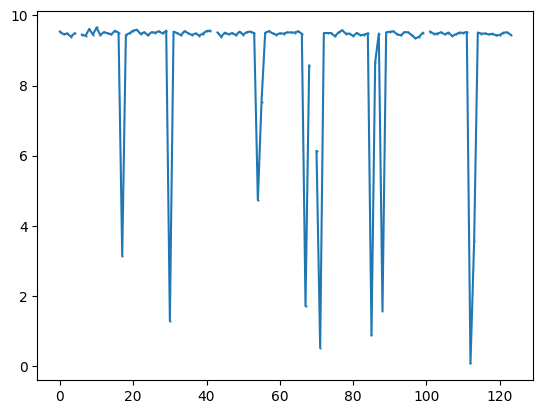

In [115]:
%matplotlib inline
plt.scatter(timeholder,noisylightcurveholder,s=0.3)
plt.plot(timeholder,noisylightcurveholder)